In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cases = np.array([[1, 0, 0], [0.1, 0, 0], [10, 0, 0], [1, 0, 10], [1, 1, 1], [0.1, -1, -1]])

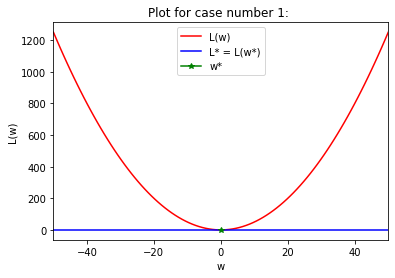

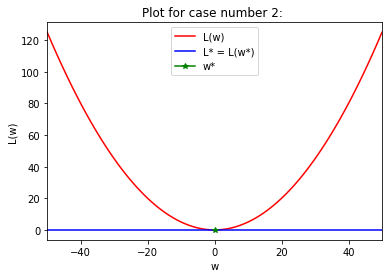

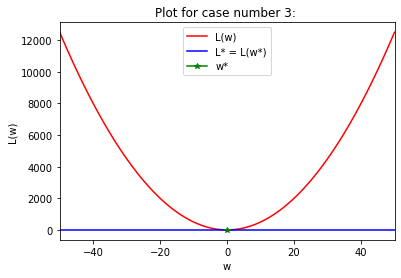

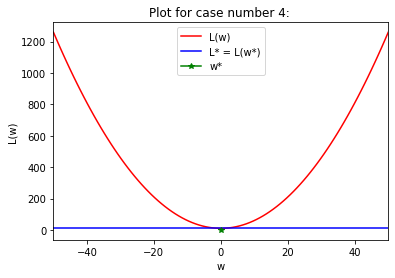

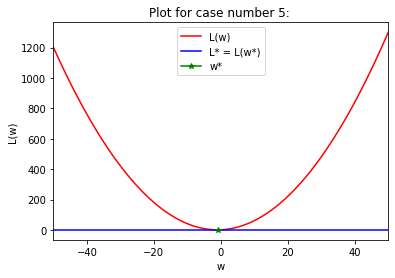

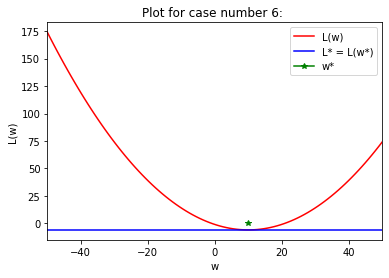

In [ ]:
#1
def f1(i, x):
  return (1 / 2 * cases[i][0] * (x ** 2) + cases[i][1] * x + cases[i][2])

def der1(t, w):
  return (cases[t][0] * w + cases[t][1])

def min1(t):
  return (-cases[t][1] / cases[t][0])

for i in range(6):

  x = np.linspace(-50, 50, 100)
  plt.xlim(-50, 50)

  plt.title('Plot for case number %d: ' %(i + 1))

  plt.plot(x, f1(i, x), c = 'r', label = 'L(w)')
  plt.plot(x, f1(i, min1(i)) + 0 * x, c = 'b', label = 'L* = L(w*)')
  plt.plot(min1(i), 0, c = 'g', marker = '*', label = 'w*')

  plt.xlabel('w')
  plt.ylabel('L(w)')
  
  plt.legend()
  plt.pause(0.1)

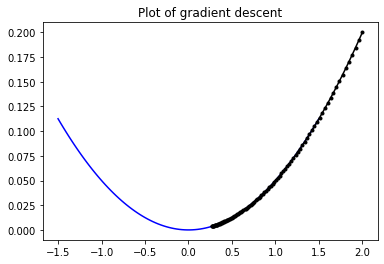

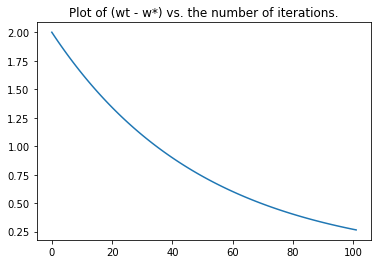

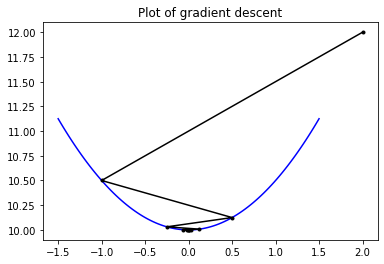

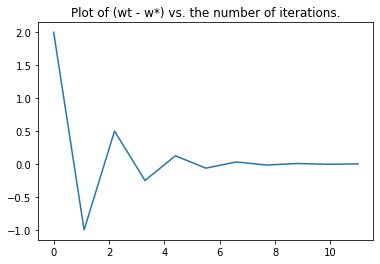

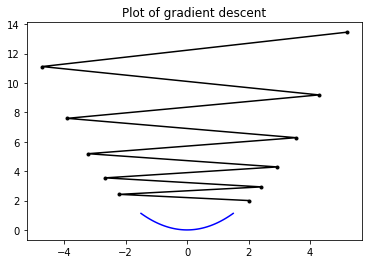

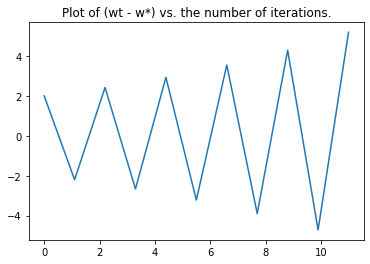

In [ ]:
#2

### for the custom function used in Q3 ###

def f2(w):
  return (w ** 4 + w ** 3 - 3 * (w ** 2) + 1)

def der2(w):
  return (4 * (w ** 3) + 3 * (w ** 2) - 6 * w)

min2 = -1.656

### ---------------------------------- ###

x = []

def gradient_descent(iterations, alpha, t, beta):

  w = 2
  v = 0
  prev_v = 0

  x.clear()
  x.append(w)

  for i in range(iterations):

    if (t < 6):
      v = beta * der1(t, w) + (1 - beta) * prev_v
    else:
      v = beta * der2(w) + (1 - beta) * prev_v

    w_new = w - alpha * v
    prev_v = v
    w = w_new
    x.append(w)

  xnp = np.array(x)
  plt.title('Plot of gradient descent')

  if (t < 6):
    xo = np.linspace(-1.5, 1.5, 100)
    plt.plot(xo, f1(t, xo), c = 'b', label = 'L(w)')
    plt.plot(xnp, f1(t, xnp), c = 'black', marker = '.')
  else:
    xo = np.linspace(-2.5, 2.5, 100)
    m = f2(xo).argmin()
    minima = xo[m]
    plt.plot(xo, f2(xo), c = 'b', label = 'L(w)')
    plt.plot(xnp, f2(xnp), c = 'black', marker = '.')

  plt.pause(0.1)

  plt.title('Plot of (wt - w*) vs. the number of iterations.')
  r = np.linspace(0, iterations + 1, iterations + 1)

  if (t < 6):
    plt.plot(r, xnp - min1(t))
  else:
    plt.plot(r, xnp - minima)

  plt.pause(0.1)

#converges without oscillating
gradient_descent(100, 0.2, 1, 1)

#converges with oscillation
gradient_descent(10, 1.5, 3, 1)

#diverges
gradient_descent(10, 2.1, 0, 1)

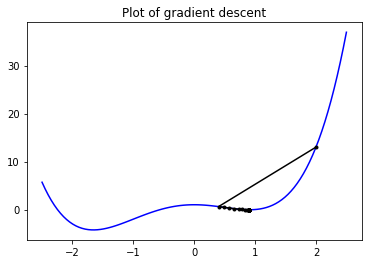

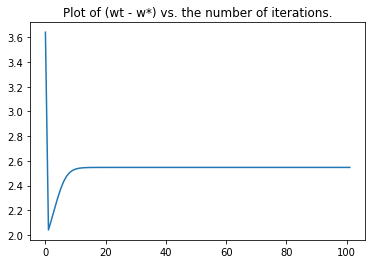

In [ ]:
#3(a) Gradient descent without momentum
gradient_descent(100, 0.05, 6, 1)

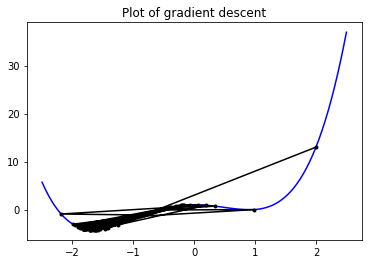

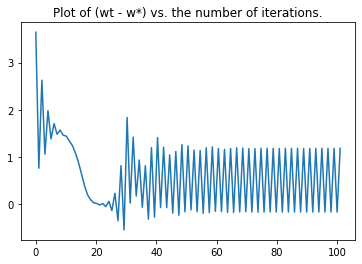

In [ ]:
#3(b) Gradient descent with momentum
gradient_descent(100, 0.05, 6, 1.8)

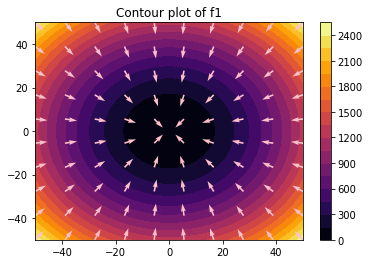

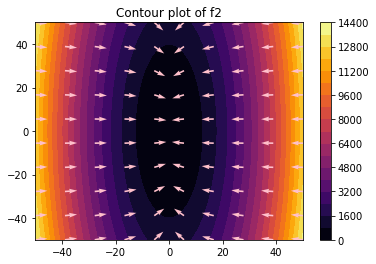

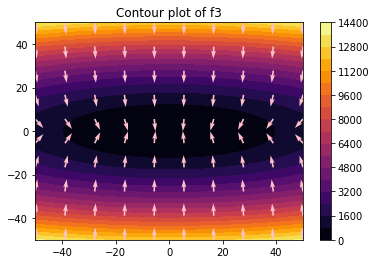

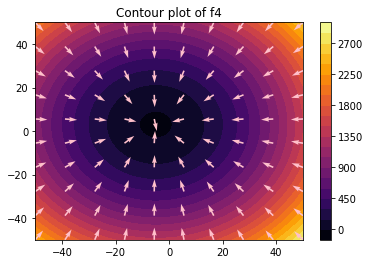

In [ ]:
#4
cases_2d = np.array([[1, 1, 0, 0, 0], [10, 1, 0, 0, 0], [1, 10, 0, 0, 0], [1, 1, 5, -3, -2]])

def function(i, w1, w2):
  return (1 / 2) * (cases_2d[i][0] * (w1 ** 2) + cases_2d[i][1] * (w2 ** 2)) + cases_2d[i][2] * w1 + cases_2d[i][3] * w2 + cases_2d[i][4]

def dev1(i, w1):
  return (cases_2d[i][0] * w1 + cases_2d[i][2])

def dev2(i, w2):
  return (cases_2d[i][1] * w2 + cases_2d[i][3])

def mi1(i):
  return -cases_2d[i][2] / cases_2d[i][0]

def mi2(i):
  return -cases_2d[i][3] / cases_2d[i][1]

w1 = np.linspace(-50, 50, 100)
w2 = np.linspace(-50, 50, 100)

w_1 = np.linspace(-50, 50, 10)
w_2 = np.linspace(-50, 50, 10)

W1, W2 = np.meshgrid(w1, w2)
W_1, W_2 = np.meshgrid(w_1, w_2)

for i in range(4):
  L = function(i, W1, W2)

  u = -dev1(i, W_1)
  v = -dev2(i, W_2)
  nom = np.linalg.norm(np.array([u, v]), axis = 0)
  u /= nom
  v /= nom

  plt.title('Contour plot of f%d' %(i + 1))
  plt.contourf(W1, W2, L, 20, cmap = 'inferno')
  plt.colorbar()
  plt.quiver(w_1, w_2, 10 * u, 10 * v, units = 'xy', scale = 2, color = 'pink')
  plt.pause(0.1)

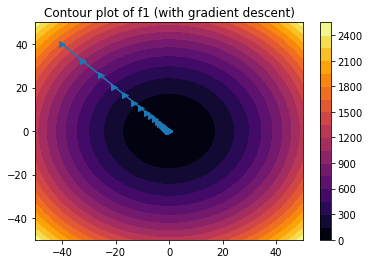

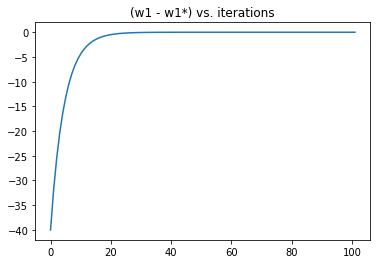

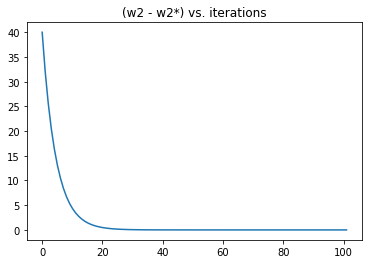

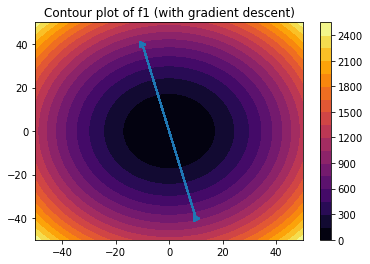

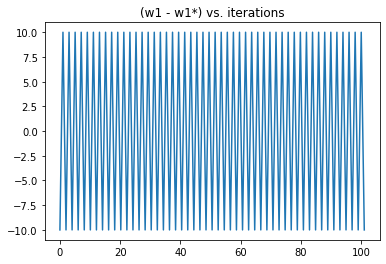

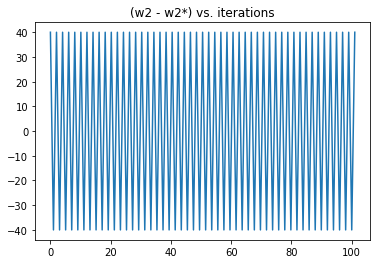

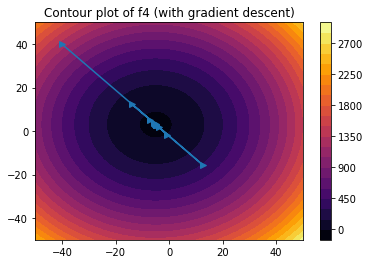

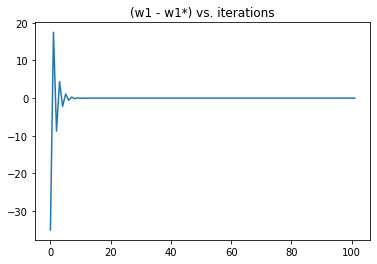

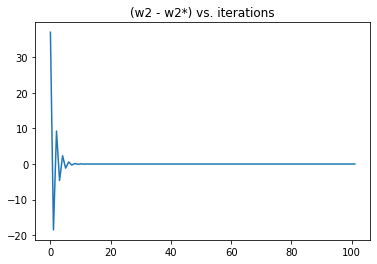

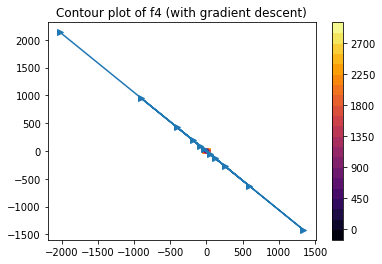

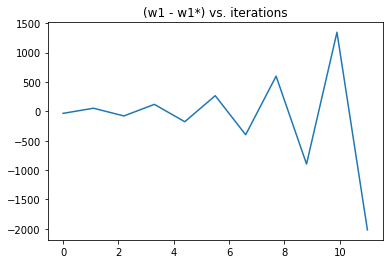

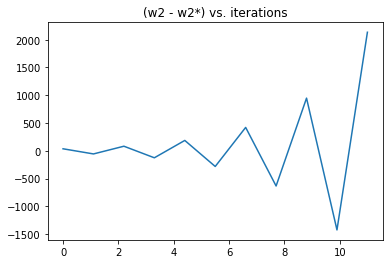

In [ ]:
def gradient_descent_2d(iterations, alpha, t, w1i, w2i):

  x = []
  y = []
  w1 = w1i
  w2 = w2i
  x.append(w1)
  y.append(w2)

  for i in range(iterations):
    w1 -= alpha * dev1(t, w1)
    w2 -= alpha * dev2(t, w2)
    x.append(w1)
    y.append(w2)

  L = function(t, W1, W2)
  plt.title('Contour plot of f%d (with gradient descent)' %(t + 1))
  plt.contourf(W1, W2, L, 20, cmap = 'inferno')
  plt.plot(x, y, marker = '>')
  plt.colorbar()
  plt.pause(0.1)

  x = np.array(x)
  y = np.array(y)
  it = np.linspace(0, iterations + 1, iterations + 1)
  
  plt.title('(w1 - w1*) vs. iterations')
  plt.plot(it, x - mi1(t))
  plt.pause(0.1)

  plt.title('(w2 - w2*) vs. iterations')
  plt.plot(it, y - mi2(t))
  plt.pause(0.1)

#converging without oscillation - ok
gradient_descent_2d(100, 0.2, 0, -40, 40)

#converging with oscillation on one axis - not ok?
#gradient_descent_2d(100, 1.1, 0, -5, 40)

#oscillating on both parameters (no convergence) - ok
gradient_descent_2d(100, 2, 0, -10, 40)

#converging with oscillation on both parameters - ok
gradient_descent_2d(100, 1.5, 3, -40, 40)

#diverging - ok
gradient_descent_2d(10, 2.5, 3, -40, 40)